### 1. What is the Data?
##### The dataset includes every play by play data of the NFL from 2009-2016. I will be using the dataset to predict the class of plays based on the situations in the game. There are two types of plays run and pass plays. A lot of football teams have turned to analytics instead relying on their gut feelings. There are a lot of features in the dataset but I will be using only that impact the playcalling on offensive side of the ball. 

### 1.1 Plan---
#### Playcalling in the NFL depends on certain features 
- The down
- Time (quarter and game)
- yards need to gain a first down
- team personnel (I don't know how to incorporate this) 


### 1.2 Goal 
##### My goal is to answer the folloing questions to improve in game strategy:
1.does the play time difference help teams come up with a better play?

2.are there differences in playcalling in different quarters of competitive games?

### Import 

In [64]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import sklearn
import statsmodels.formula.api as smf
from scipy.stats import mstats 
from scipy.stats.mstats import winsorize
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif,chi2
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import ensemble
from sklearn.metrics import auc, precision_recall_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MiniBatchKMeans
from pylab import rcParams
import time
import scipy.stats as stats
from scipy.stats import ttest_ind_from_stats

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams.update({'font.size': 25})
%matplotlib inline

In [2]:
#read the csv
df = pd.read_csv(r'C:\Users\Rahul Miglani\Untitled Folder\NFL1.csv')

### 2. EDA

In [3]:
#Take a look at the shape of the data 
df.shape

(407688, 102)

In [4]:
#Check out the types of data types in the DataFrames
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407688 entries, 0 to 407687
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 317.3+ MB


In [5]:
df.head()

Date      GameID  Drive  qtr  down   time  TimeUnder  TimeSecs  \
0  2009-09-10  2009091000      1    1   NaN  15:00         15    3600.0   
1  2009-09-10  2009091000      1    1   1.0  14:53         15    3593.0   
2  2009-09-10  2009091000      1    1   2.0  14:16         15    3556.0   
3  2009-09-10  2009091000      1    1   3.0  13:35         14    3515.0   
4  2009-09-10  2009091000      1    1   4.0  13:27         14    3507.0   

   PlayTimeDiff SideofField  ...    yacEPA  Home_WP_pre  Away_WP_pre  \
0           0.0         TEN  ...       NaN     0.485675     0.514325   
1           7.0         PIT  ...  1.146076     0.546433     0.453567   
2          37.0         PIT  ...       NaN     0.551088     0.448912   
3          41.0         PIT  ... -5.031425     0.510793     0.489207   
4           8.0         PIT  ...       NaN     0.461217     0.538783   

   Home_WP_post  Away_WP_post  Win_Prob       WPA    airWPA    yacWPA  Season  
0      0.546433      0.453567  0.485675  0.060758       NaN       NaN    2009  
1      0.551088      0.448912  0.546433  0.004655 -0.032244  0.036899    2009  
2      0.510793      0.489207  0.551088 -0.040295       NaN       NaN    2009  
3      0.461217      0.538783  0.510793 -0.049576  0.106663 -0.156239    2009  
4      0.558929      0.441071  0.461217  0.097712       NaN       NaN    2009  

[5 rows x 102 columns]

In [6]:
#list of all the columns 
list(df.columns)

['Date',
 'GameID',
 'Drive',
 'qtr',
 'down',
 'time',
 'TimeUnder',
 'TimeSecs',
 'PlayTimeDiff',
 'SideofField',
 'yrdln',
 'yrdline100',
 'ydstogo',
 'ydsnet',
 'GoalToGo',
 'FirstDown',
 'posteam',
 'DefensiveTeam',
 'desc',
 'PlayAttempted',
 'Yards.Gained',
 'sp',
 'Touchdown',
 'ExPointResult',
 'TwoPointConv',
 'DefTwoPoint',
 'Safety',
 'Onsidekick',
 'PuntResult',
 'PlayType',
 'Passer',
 'Passer_ID',
 'PassAttempt',
 'PassOutcome',
 'PassLength',
 'AirYards',
 'YardsAfterCatch',
 'QBHit',
 'PassLocation',
 'InterceptionThrown',
 'Interceptor',
 'Rusher',
 'Rusher_ID',
 'RushAttempt',
 'RunLocation',
 'RunGap',
 'Receiver',
 'Receiver_ID',
 'Reception',
 'ReturnResult',
 'Returner',
 'BlockingPlayer',
 'Tackler1',
 'Tackler2',
 'FieldGoalResult',
 'FieldGoalDistance',
 'Fumble',
 'RecFumbTeam',
 'RecFumbPlayer',
 'Sack',
 'Challenge.Replay',
 'ChalReplayResult',
 'Accepted.Penalty',
 'PenalizedTeam',
 'PenaltyType',
 'PenalizedPlayer',
 'Penalty.Yards',
 'PosTeamScore',
 'De

### 2.1 Explore the Data to obtain the useful features needed to answer my questions

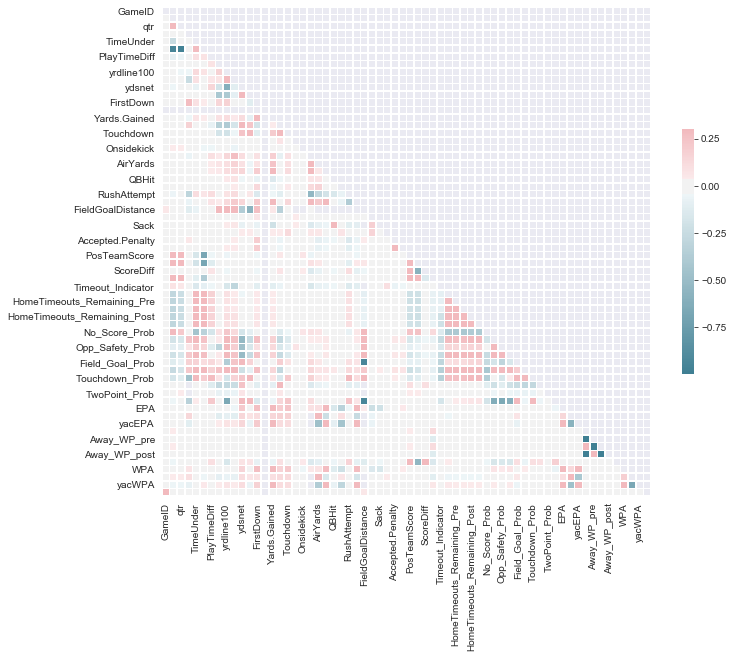

In [7]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
#Look at the unique values of the Down 
df.down.unique()

array([nan,  1.,  2.,  3.,  4.])

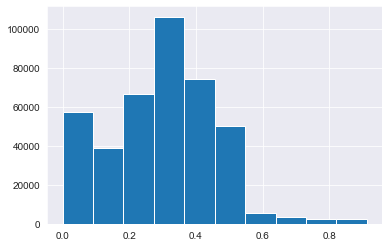

In [9]:
plt.hist(df.Touchdown_Prob)
plt.show()

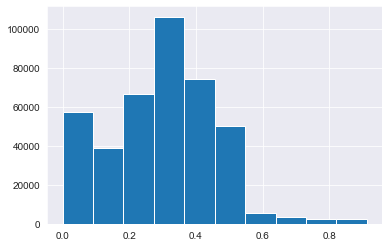

In [10]:
plt.hist(df.Touchdown_Prob)
plt.show()

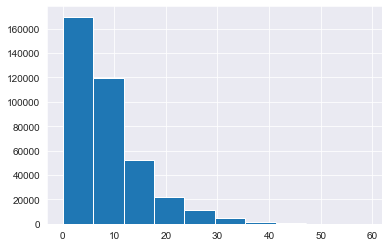

In [11]:
plt.hist(df.AbsScoreDiff)
plt.show()

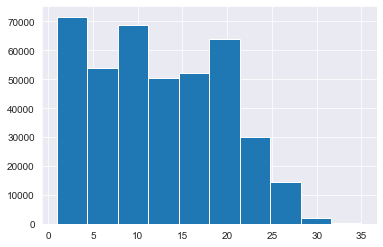

In [12]:
plt.hist(df.Drive)
plt.show()

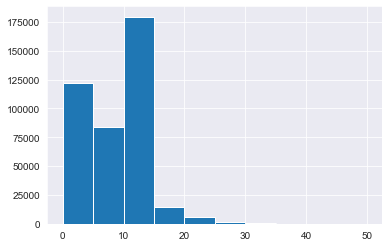

In [13]:
plt.hist(df.ydstogo)
plt.show()

I chose the following features because they could help answer my questions while others features are still important in the game of football they don't help much in this context

### 2.2 Explore the important features 

In [14]:
df_1 = df[['Drive', 'PlayType', 'qtr','down','TimeSecs','ydstogo','FirstDown','Yards.Gained',"AbsScoreDiff", 'Touchdown_Prob', 'Win_Prob',
          'PlayTimeDiff', 'PosTeamScore','DefTeamScore','yrdline100' ]]

In [15]:
df_1.columns = map(str.lower, df_1.columns)

In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407688 entries, 0 to 407687
Data columns (total 15 columns):
drive             407688 non-null int64
playtype          407688 non-null object
qtr               407688 non-null int64
down              346534 non-null float64
timesecs          407464 non-null float64
ydstogo           407688 non-null int64
firstdown         378877 non-null float64
yards.gained      407688 non-null int64
absscorediff      380784 non-null float64
touchdown_prob    407512 non-null float64
win_prob          382679 non-null float64
playtimediff      407244 non-null float64
posteamscore      380784 non-null float64
defteamscore      380784 non-null float64
yrdline100        406848 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 46.7+ MB


In [17]:
df_1.describe()

drive            qtr           down       timesecs  \
count  407688.000000  407688.000000  346534.000000  407464.000000   
mean       12.316158       2.577412       2.002476    1695.268944   
std         7.149527       1.129750       1.006353    1062.801012   
min         1.000000       1.000000       1.000000    -900.000000   
25%         6.000000       2.000000       1.000000     778.000000   
50%        12.000000       3.000000       2.000000    1800.000000   
75%        18.000000       4.000000       3.000000    2585.000000   
max        35.000000       5.000000       4.000000    3600.000000   

             ydstogo      firstdown   yards.gained   absscorediff  \
count  407688.000000  378877.000000  407688.000000  380784.000000   
mean        7.309403       0.290509       4.994221       7.783541   
std         4.869987       0.453998       9.102092       7.453598   
min         0.000000       0.000000     -74.000000       0.000000   
25%         3.000000       0.000000       0.000000       3.000000   
50%         9.000000       0.000000       1.000000       7.000000   
75%        10.000000       1.000000       7.000000      11.000000   
max        50.000000       1.000000      99.000000      59.000000   

       touchdown_prob       win_prob   playtimediff   posteamscore  \
count   407512.000000  382679.000000  407244.000000  380784.000000   
mean         0.295940       0.501320      20.576762      10.201424   
std          0.167845       0.287445      17.969326       9.432067   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.191206       0.276472       5.000000       2.000000   
50%          0.313676       0.504470      17.000000       7.000000   
75%          0.407684       0.725477      37.000000      16.000000   
max          0.912963       1.000000     943.000000      61.000000   

        defteamscore     yrdline100  
count  380784.000000  406848.000000  
mean       11.414484      48.644081  
std         9.910753      25.070416  
min         0.000000       1.000000  
25%         3.000000      30.000000  
50%        10.000000      49.000000  
75%        17.000000      70.000000  
max        61.000000      99.000000

In [18]:
df_1.shape

(407688, 15)

In [19]:
df_1.rename(columns = {'yards.gained' : 'yards_gained'},inplace = True)

In [20]:
df_1.head()

drive playtype  qtr  down  timesecs  ydstogo  firstdown  yards_gained  \
0      1  Kickoff    1   NaN    3600.0        0        NaN            39   
1      1     Pass    1   1.0    3593.0       10        0.0             5   
2      1      Run    1   2.0    3556.0        5        0.0            -3   
3      1     Pass    1   3.0    3515.0        8        0.0             0   
4      1     Punt    1   4.0    3507.0        8        1.0             0   

   absscorediff  touchdown_prob  win_prob  playtimediff  posteamscore  \
0           0.0        0.313676  0.485675           0.0           0.0   
1           0.0        0.423011  0.546433           7.0           0.0   
2           0.0        0.421478  0.551088          37.0           0.0   
3           0.0        0.318621  0.510793          41.0           0.0   
4           0.0        0.208111  0.461217           8.0           0.0   

   defteamscore  yrdline100  
0           0.0        30.0  
1           0.0        58.0  
2           0.0        53.0  
3           0.0        56.0  
4           0.0        56.0

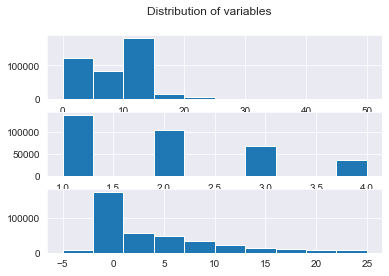

In [21]:
fig, axs = plt.subplots(3)
fig.suptitle('Distribution of variables')
axs[0].hist(df_1.ydstogo)
axs[1].hist(df_1.down)
axs[2].hist(df_1.yards_gained,range = (-5,25))
plt.show()

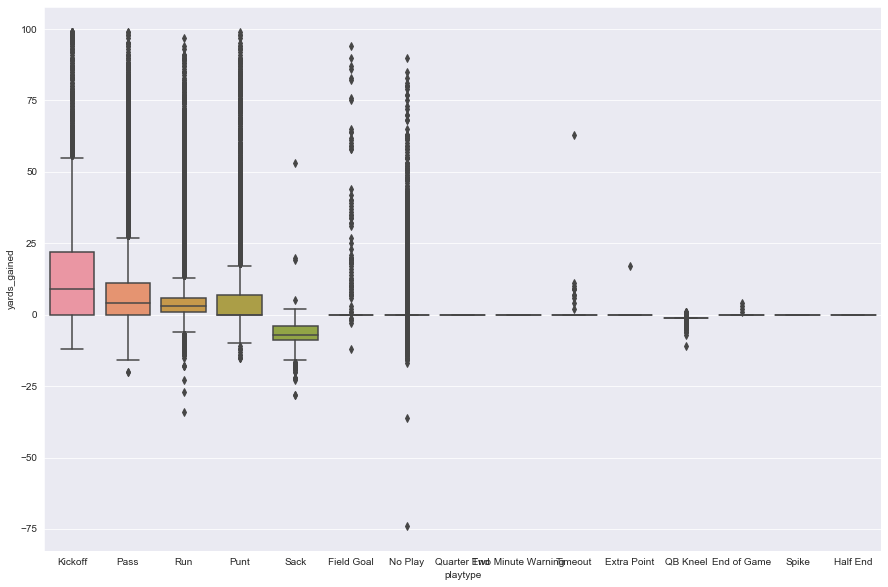

In [22]:
rcParams['figure.figsize'] = 15, 10
sns.boxplot(df_1.playtype,df_1.yards_gained)
plt.show()

In [23]:
pass_1 = df_1.loc[df_1['playtype']=='Pass']
run = df_1.loc[df_1.playtype == 'Run']

In [24]:
df_new = pd.concat([pass_1, run])
df_new.shape

(280184, 15)

### 2. 2Null Values

In [25]:
df_new.isnull().sum()

drive               0
playtype            0
qtr                 0
down              632
timesecs           31
ydstogo             0
firstdown          20
yards_gained        0
absscorediff       36
touchdown_prob     63
win_prob           63
playtimediff       45
posteamscore       36
defteamscore       36
yrdline100          7
dtype: int64

In [26]:
# get the number of missing data points per column
missing_values_count = df_new.isnull().sum()
# how many total missing values do we have?
total_cells = np.product(df_new.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.02305627730348628

In [27]:
df_new.dropna(inplace = True)

In [28]:
df_new.isnull().sum()

drive             0
playtype          0
qtr               0
down              0
timesecs          0
ydstogo           0
firstdown         0
yards_gained      0
absscorediff      0
touchdown_prob    0
win_prob          0
playtimediff      0
posteamscore      0
defteamscore      0
yrdline100        0
dtype: int64

### 2.3 Outliers 

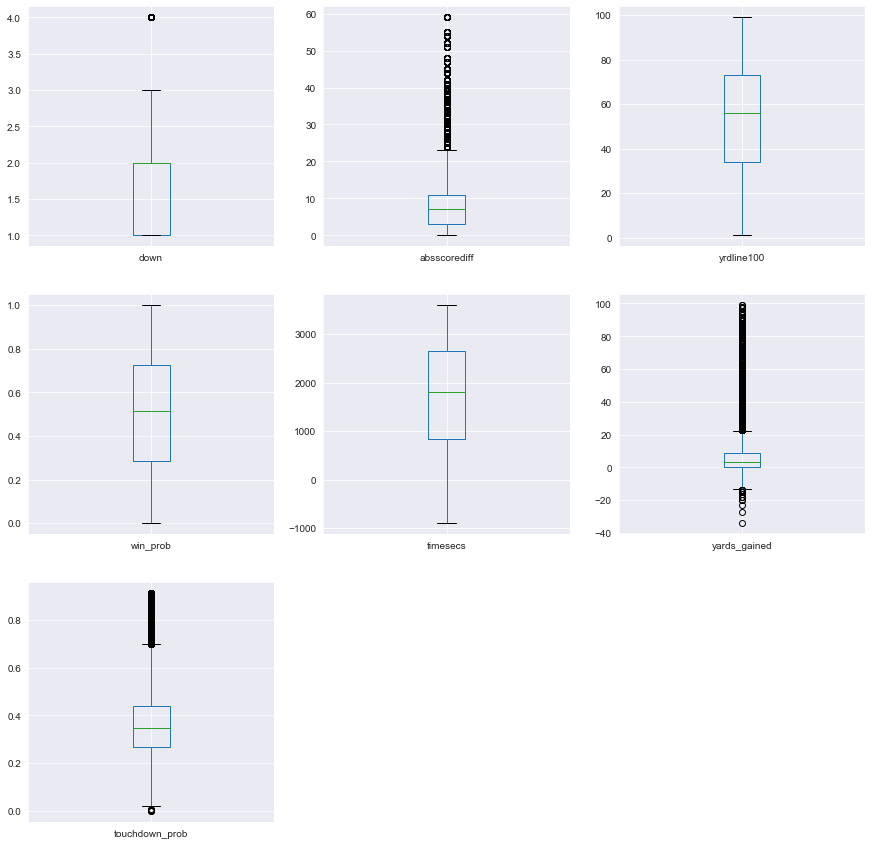

In [29]:
plt.figure(figsize=(15,15))
for i, col in enumerate(['down','absscorediff',
             'yrdline100','win_prob','timesecs',
             'yards_gained', 'touchdown_prob'], start=1):
    plt.subplot(3, 3, i)
    df_new.boxplot(col)

In [30]:
def outlier_count(col, data=df_1):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [31]:
cols = list(df_new.columns)[2:]
for col in cols:
    outlier_count(col)

---------------qtr---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------down---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------timesecs---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------ydstogo---------------
Number of outliers: 3796
Percent of data that is outlier: 0.93%
---------------firstdown---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------yards_gained---------------
Number of outliers: 34493
Percent of data that is outlier: 8.46%
---------------absscorediff---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------touchdown_prob---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------win_prob---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------playtimediff---------------
Number of outliers: 0
Percent of data that is outlie

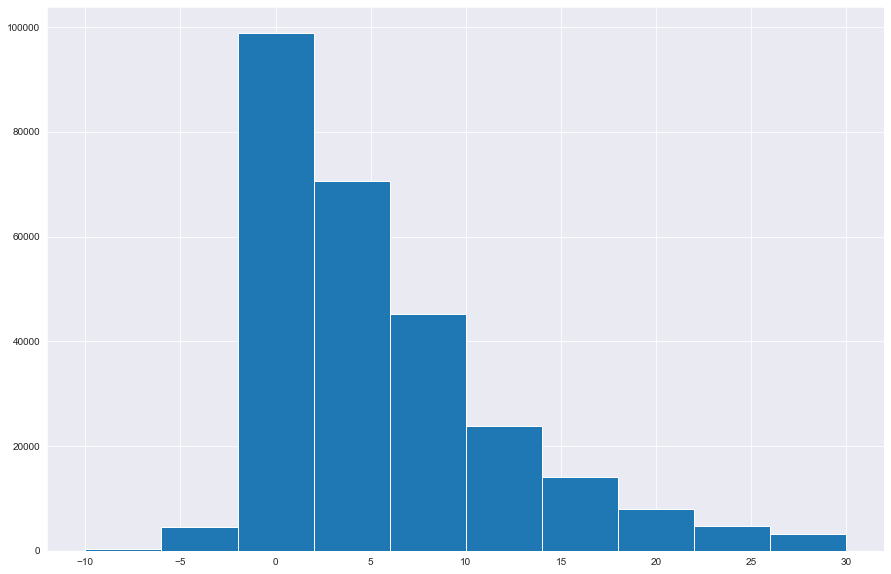

In [32]:
#Distribution of Yards gained this makes sense because there are more plays that gain 0-20 yards than more than 20 yards
plt.hist(df_new.yards_gained,range = (-10,30))
plt.show()

#### I will keep the outliers because I also would like to see the difference in playcalling after a big play

#### I only want to look at the competitive games and not the blowouts 

In [33]:
# Isolate the games that were compettitive not blowouts
comp= df_new.loc[df_new['absscorediff']<= 15]

In [34]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239451 entries, 1 to 407660
Data columns (total 15 columns):
drive             239451 non-null int64
playtype          239451 non-null object
qtr               239451 non-null int64
down              239451 non-null float64
timesecs          239451 non-null float64
ydstogo           239451 non-null int64
firstdown         239451 non-null float64
yards_gained      239451 non-null int64
absscorediff      239451 non-null float64
touchdown_prob    239451 non-null float64
win_prob          239451 non-null float64
playtimediff      239451 non-null float64
posteamscore      239451 non-null float64
defteamscore      239451 non-null float64
yrdline100        239451 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 29.2+ MB


In [35]:
comp.shape

(239451, 15)

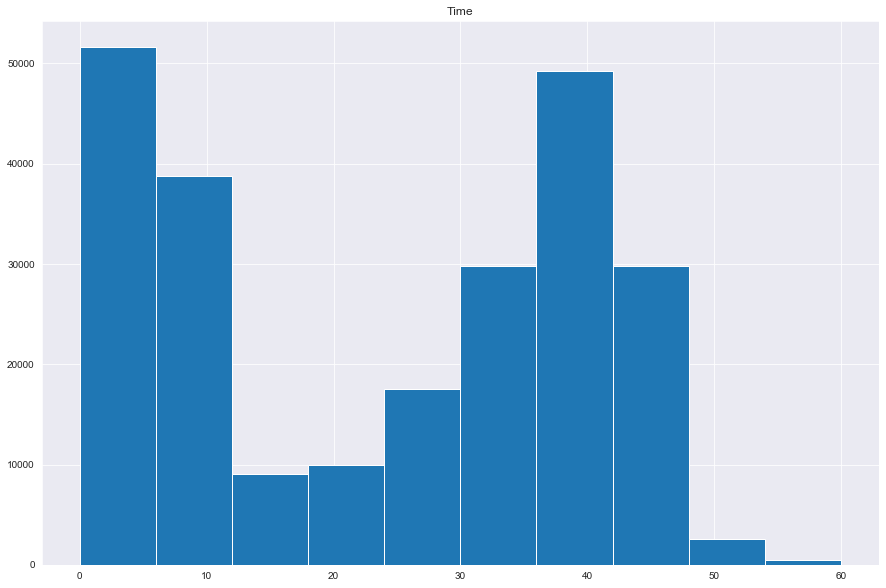

In [36]:
plt.hist(comp['playtimediff'],range = (0,60))
plt.title('Time')
plt.show()

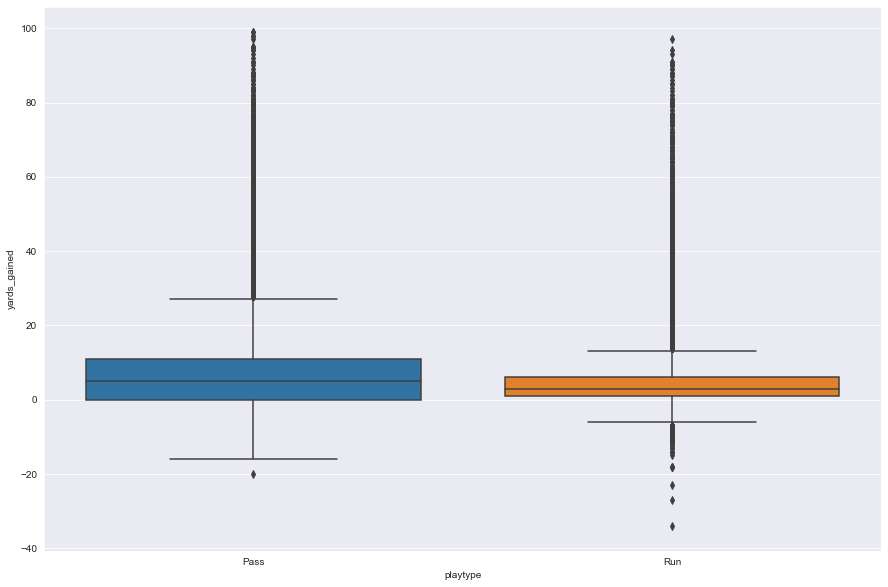

In [37]:
rcParams['figure.figsize'] = 15, 10
sns.boxplot(comp.playtype, comp.yards_gained)
plt.show()

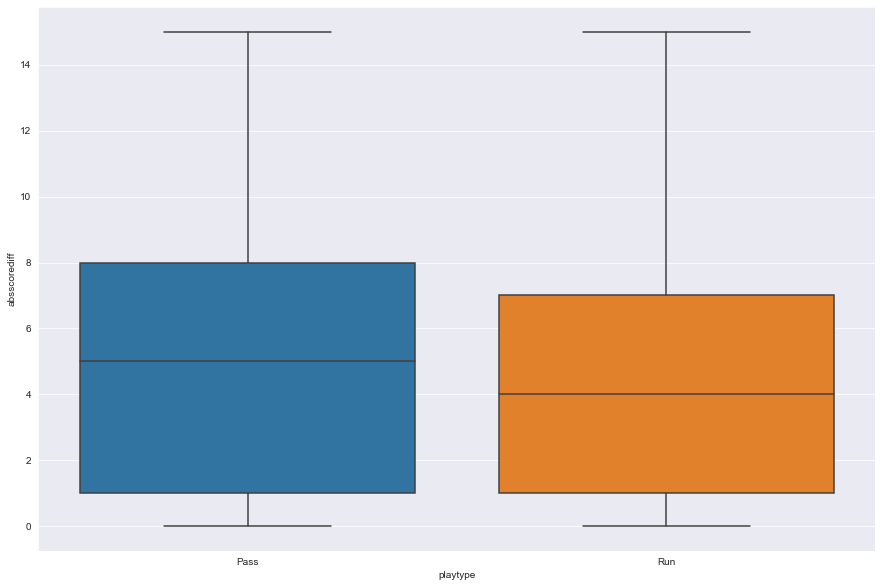

In [38]:
rcParams['figure.figsize'] = 15, 10
sns.boxplot(comp.playtype, comp.absscorediff)
plt.show()

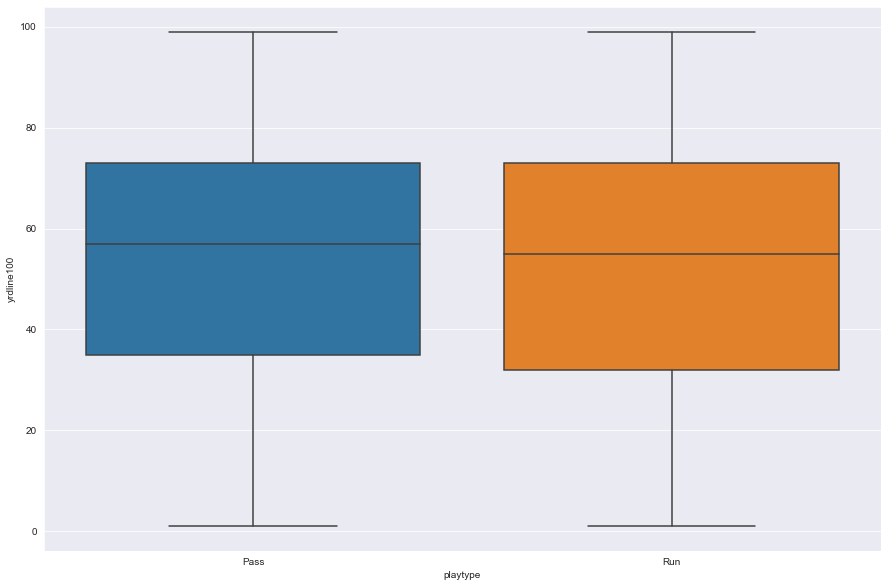

In [39]:
rcParams['figure.figsize'] = 15, 10
sns.boxplot(comp.playtype, comp.yrdline100)
plt.show()

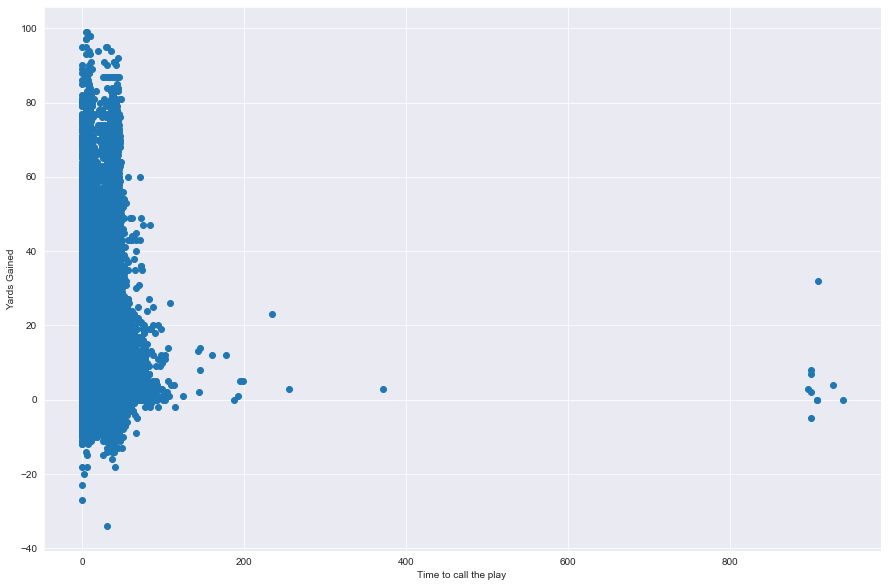

In [40]:
plt.scatter(y = comp.yards_gained, x =comp.playtimediff)
plt.xlabel('Time to call the play ')
plt.ylabel('Yards Gained')
plt.show()

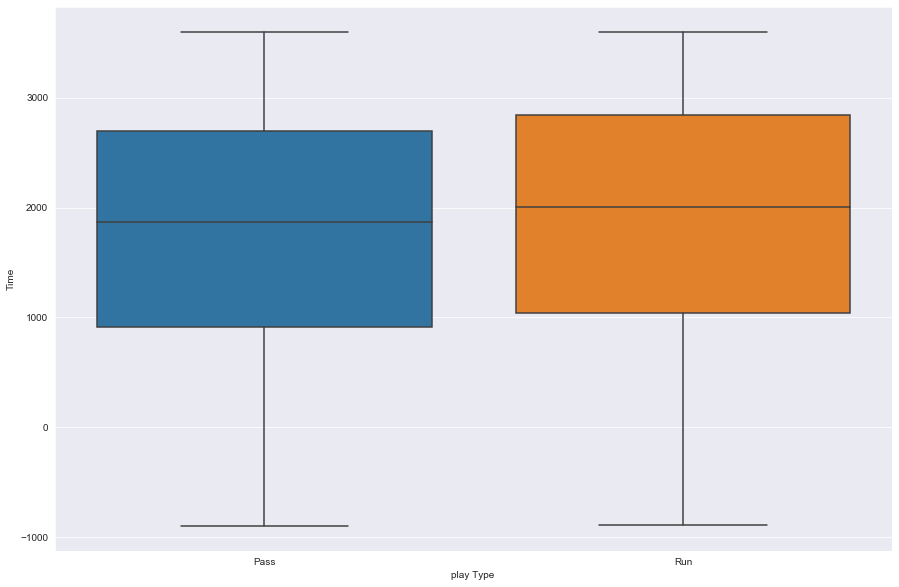

In [41]:
sns.boxplot(y = comp.timesecs, x =comp.playtype)
plt.xlabel('play Type ')
plt.ylabel('Time')
plt.show()

In [42]:
comp['playtype'] = pd.get_dummies(comp['playtype'])

#### 3.0 Preprocessing data 

In [43]:
# Make sure the number of rows divides evenly into four samples.
rows = comp.shape[0] - comp.shape[0] % 2
comp = comp.iloc[:rows, :]

X =  comp.iloc[:, :10]

# Standarize and fit the data first 
X_std = StandardScaler().fit_transform(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=4)
X_pcax = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pcax,
    test_size=0.5,
    random_state=123)

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 11.
    for nclust in range(2, 11):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

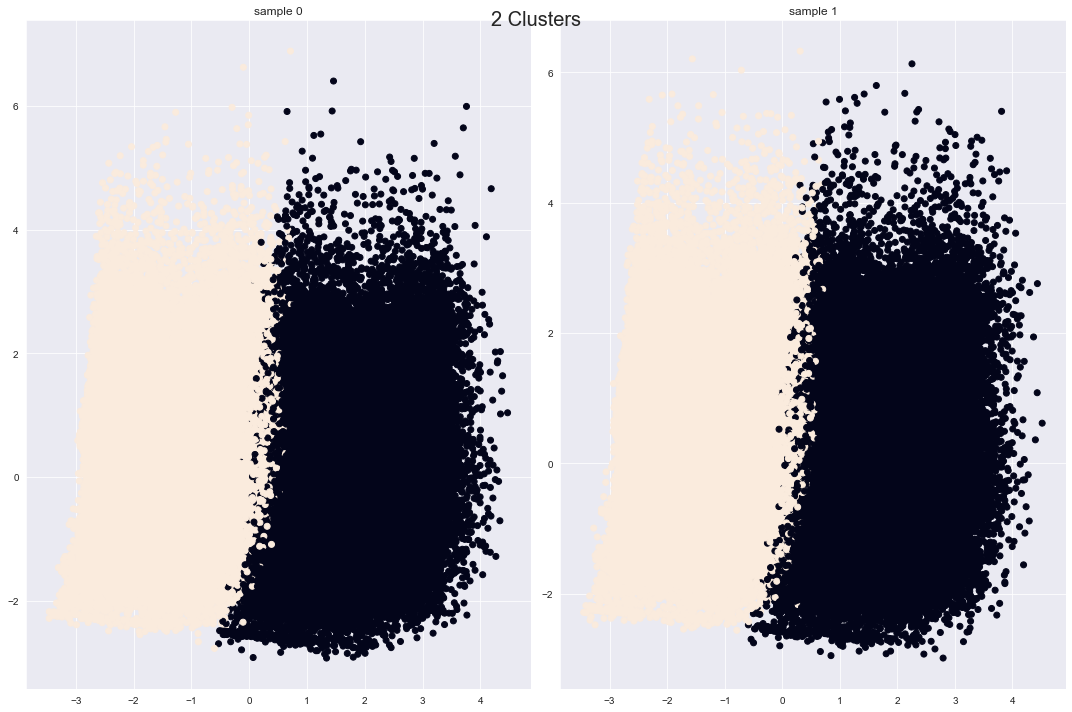

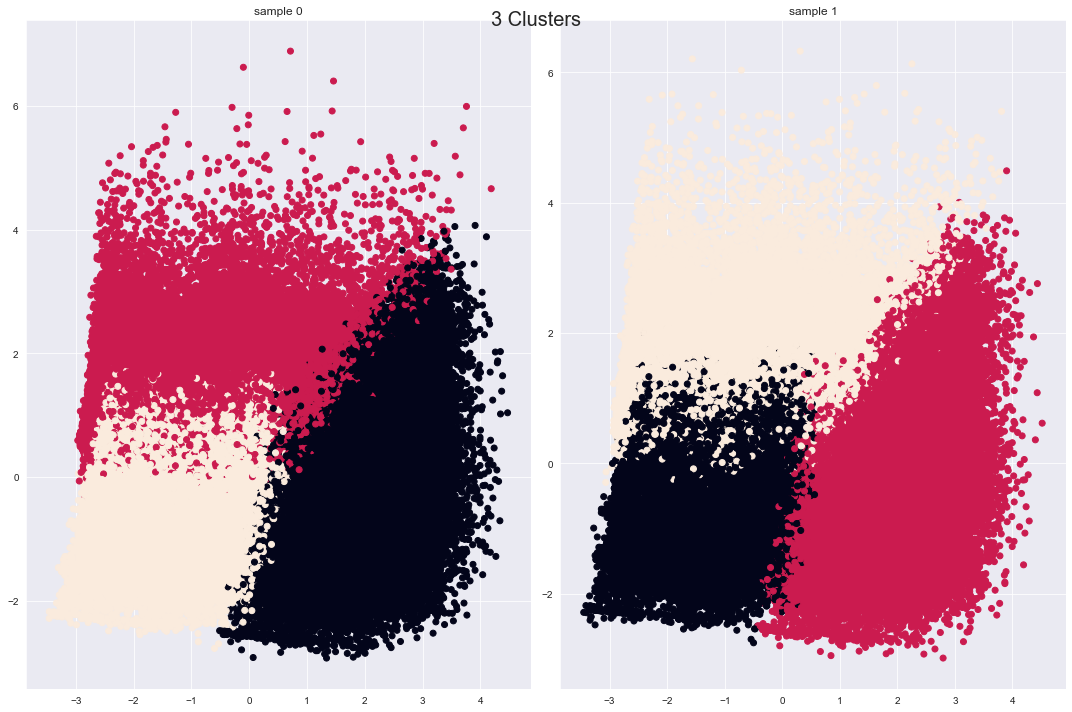

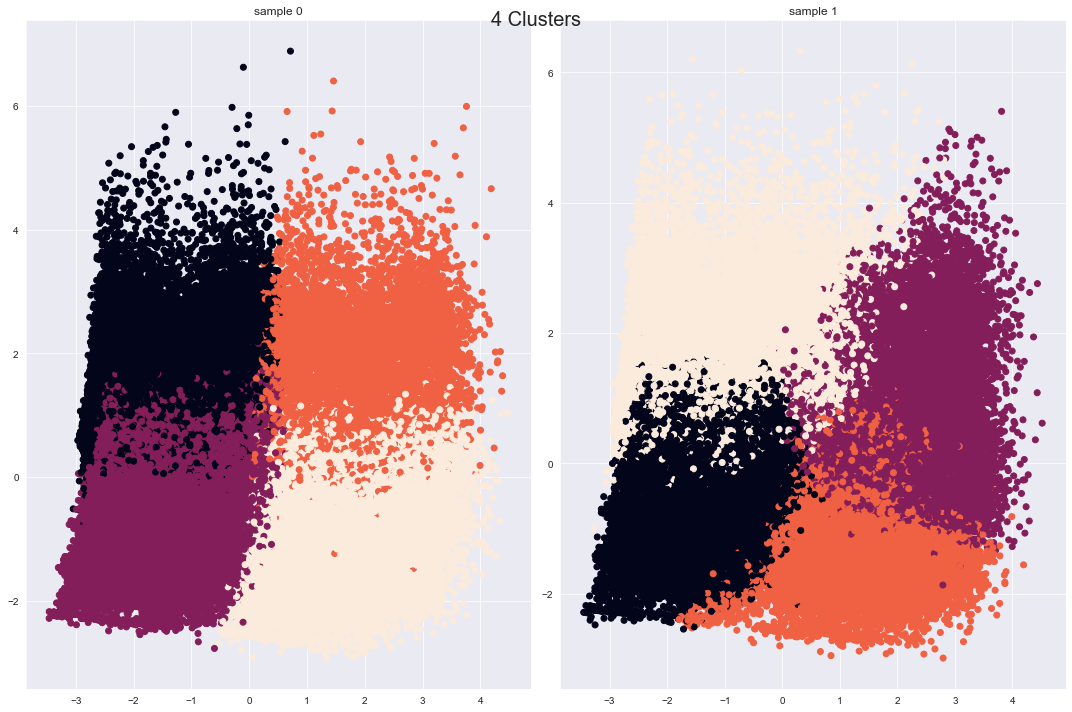

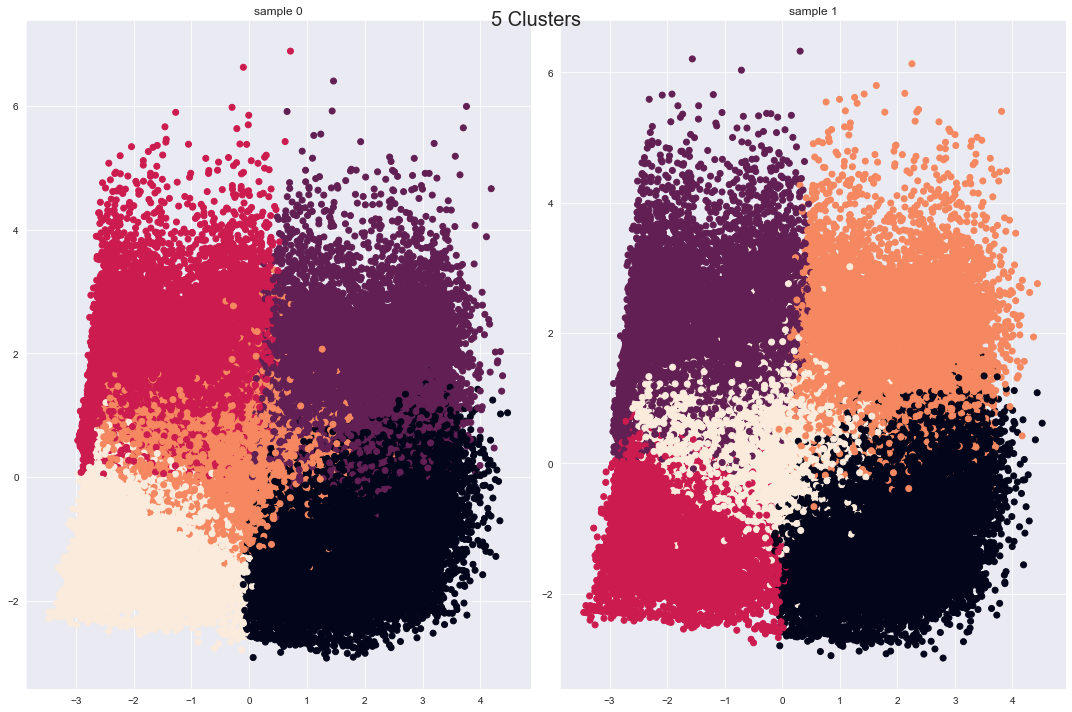

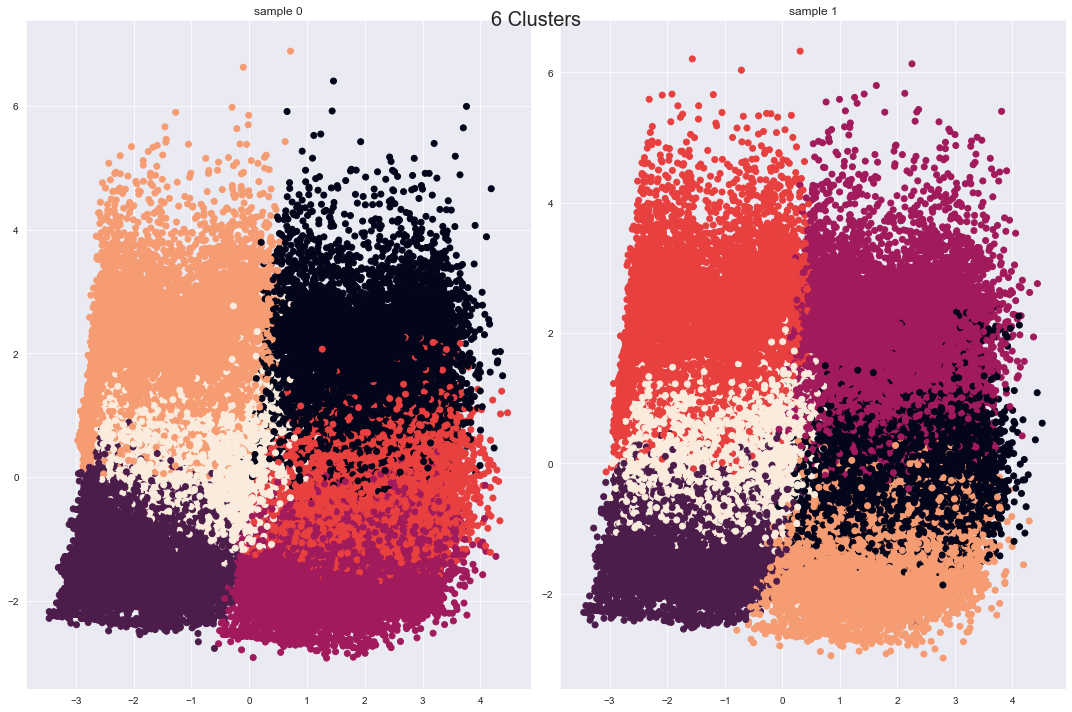

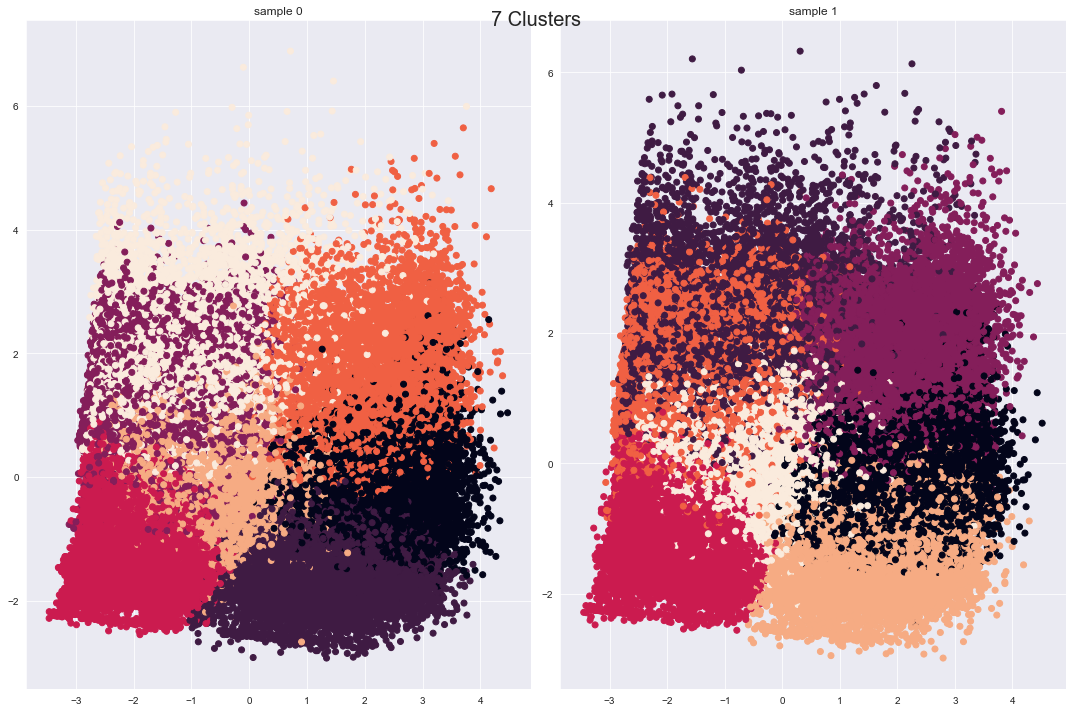

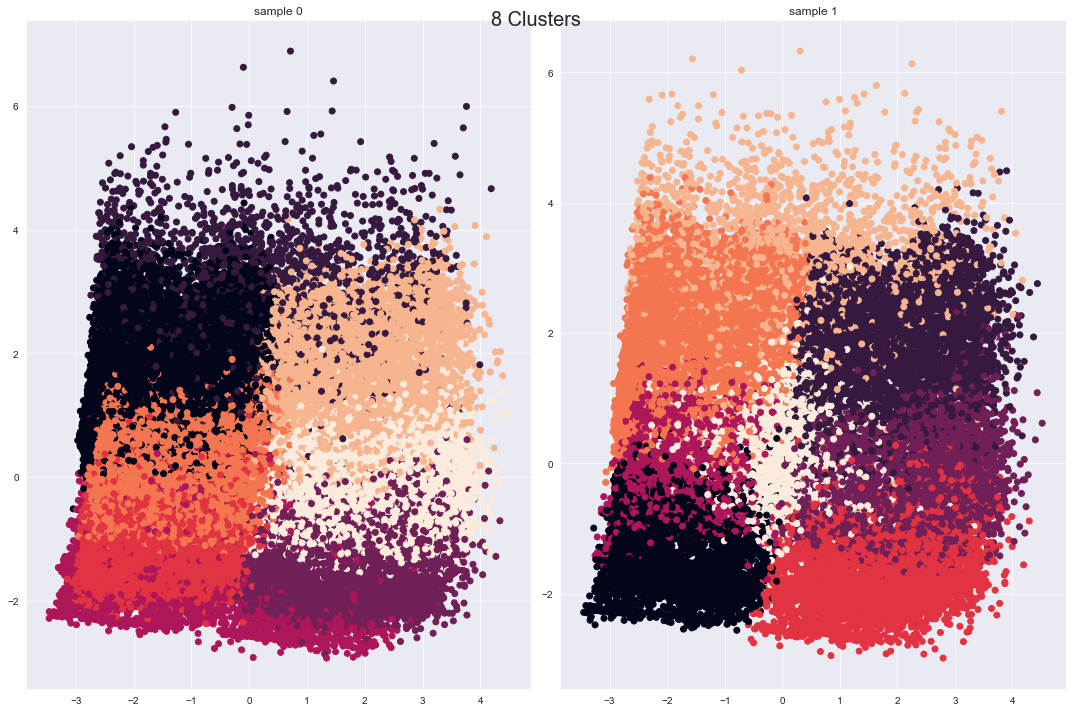

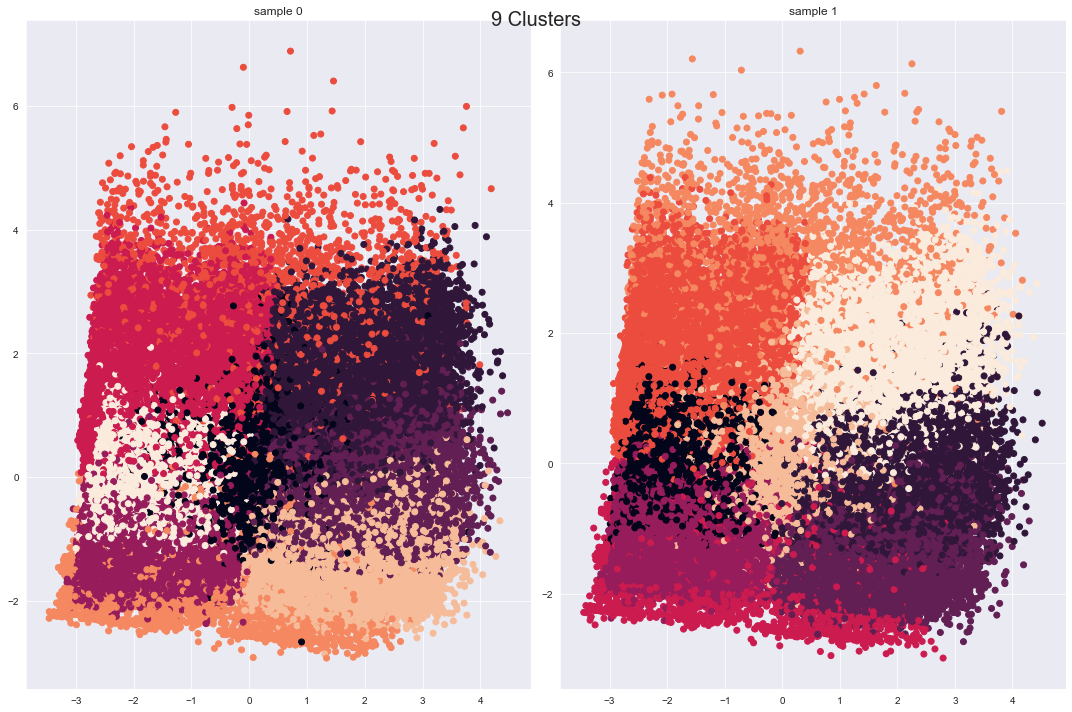

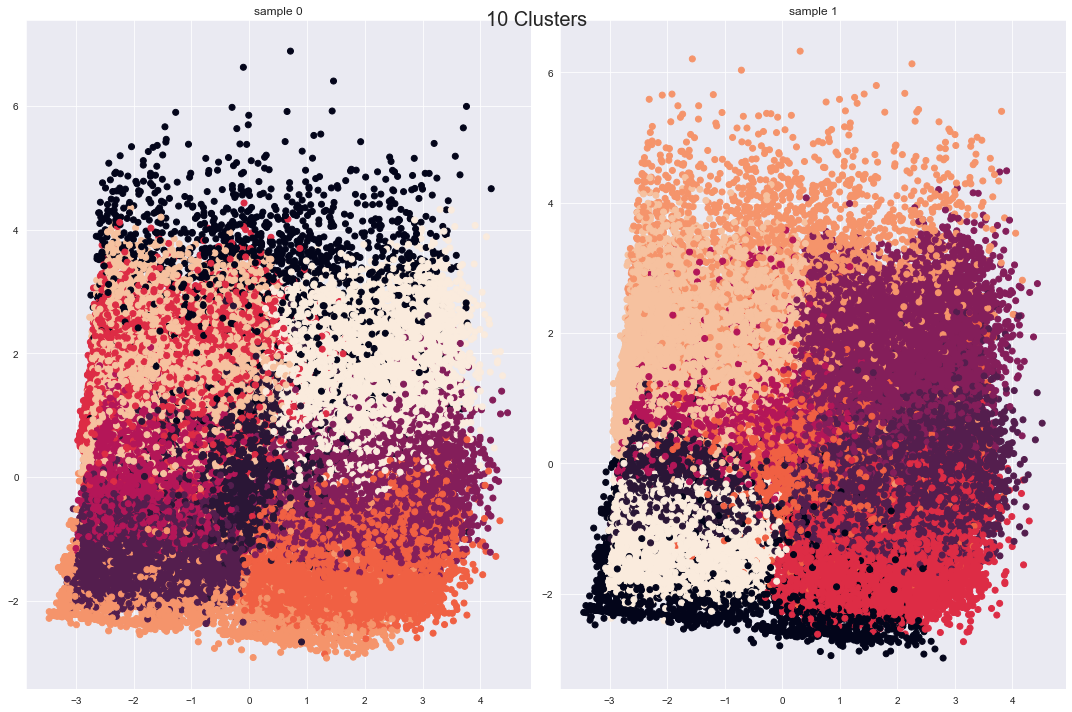

In [44]:
#For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 11):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
        axarr[i].set_xlim()
        axarr[i].set_ylim()
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()

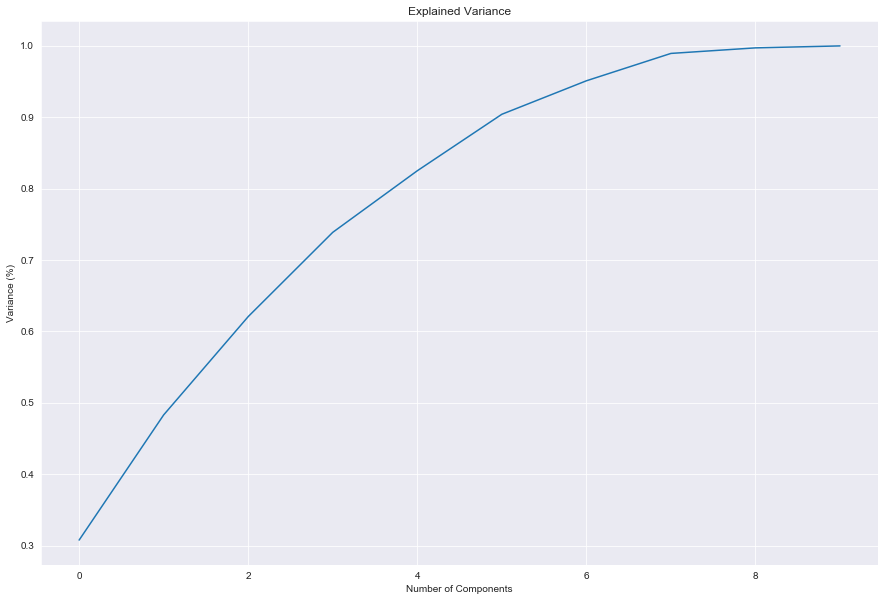

In [45]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_std)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

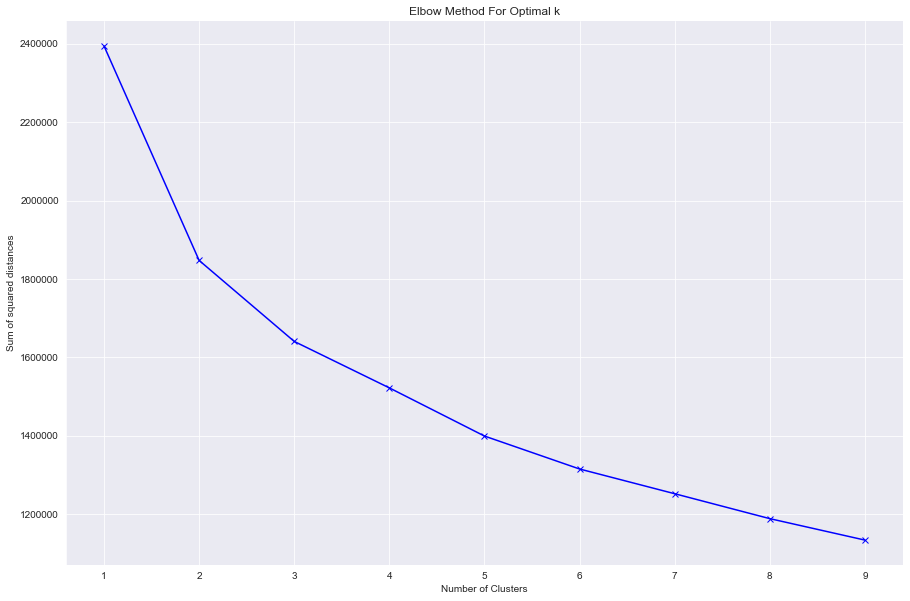

In [46]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, random_state = 7)
    km = km.fit(X_std)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
sns.despine()
plt.show()


In [47]:
# Run k means model
for k in np.arange(2, 6, 1):
    for X_std in [X]: 
        result = KMeans(n_clusters=k, random_state=123, tol=0.001).fit(X_std)
        labels = result.labels_
        silhouette = metrics.silhouette_score(X_std, labels, metric='euclidean')
        print('K: {}, silhouette: {}'.format(k, silhouette))

K: 2, silhouette: 0.6096566222216139
K: 3, silhouette: 0.6006071071107184
K: 4, silhouette: 0.5713246318526324
K: 5, silhouette: 0.5740180936799477


In [48]:
# Run k means model only with 9 clusters
cluster2 = KMeans(n_clusters=2, random_state=123, n_jobs=-1).fit(X_std)
labels = cluster2.labels_
metrics.silhouette_score(X_std, labels, metric='euclidean')

0.6096949891145577

In [49]:
time_start = time.time()

for i in range(2,9):
    # Defining the agglomerative clustering
    gmm_cluster = GaussianMixture(n_components=i, covariance_type = 'full', random_state=7)
     # Fit model
    clusters = gmm_cluster.fit_predict(X_std)
    print('Silhouette Score for {}-cluster GMM, {} Covariance: {}'.format(i, type, metrics.silhouette_score(X_std, clusters, metric='euclidean')))
    
print('Time for GMM {} Silhouette Score Loop: {} seconds.'.format(i, time.time()-time_start))

Silhouette Score for 2-cluster GMM, <class 'type'> Covariance: 0.400863090033324
Silhouette Score for 3-cluster GMM, <class 'type'> Covariance: -0.03746493141872045
Silhouette Score for 4-cluster GMM, <class 'type'> Covariance: 0.5519243766988118
Silhouette Score for 5-cluster GMM, <class 'type'> Covariance: 0.5074967793567842
Silhouette Score for 6-cluster GMM, <class 'type'> Covariance: 0.38777237307128926
Silhouette Score for 7-cluster GMM, <class 'type'> Covariance: 0.31654902884784325
Silhouette Score for 8-cluster GMM, <class 'type'> Covariance: 0.3343351435049116
Time for GMM 8 Silhouette Score Loop: 9718.938879013062 seconds.


In [50]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters_1 = dbscan_cluster.fit_predict(X_std)

In [51]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters_1, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.6161521468067118


### A high silhouette score indicates that the object in the clusters are well matched to their own clusters than the other cluster. K-means clustering is the best algorithm based on it's high Silhouette score of .609.                                                                                           

In [52]:
comp['labels'] = cluster2.labels_

In [53]:
comp_0 = comp.loc[comp['labels'] == 0]
comp_1 = comp.loc[comp['labels'] == 1]

In [54]:
comp_grouped = comp.groupby(['labels']).mean()

In [55]:
comp_grouped

drive  playtype      qtr      down     timesecs   ydstogo  \
labels                                                                  
0       17.885245  0.572041  3.56567  1.806755   819.223692  8.635999   
1        6.124598  0.559554  1.56486  1.763670  2646.992887  8.614711   

        firstdown  yards_gained  absscorediff  touchdown_prob  win_prob  \
labels                                                                    
0        0.268584      6.008949      6.545262        0.359876  0.518883   
1        0.261672      5.972191      4.436011        0.355810  0.523754   

        playtimediff  posteamscore  defteamscore  yrdline100  
labels                                                        
0          23.196504     15.460993     16.270355   51.476158  
1          23.523689      4.353529      5.098743   53.466505

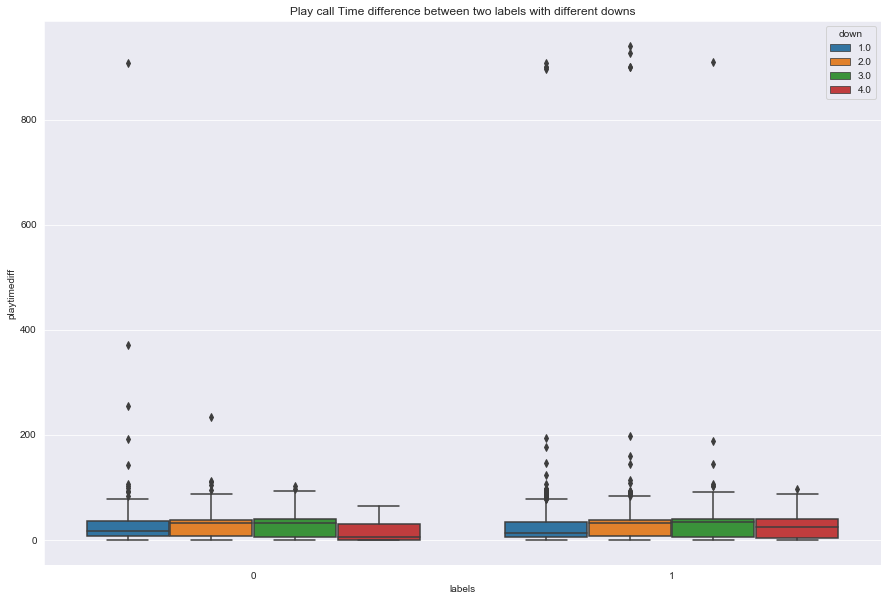

In [56]:
sns.boxplot(comp.labels,comp.playtimediff,hue= comp.down)
plt.title('Play call Time difference between two labels with different downs')
plt.show()

In [67]:
comp_0.agg(['sum','std','mean','count'])

drive       playtype           qtr           down      timesecs  \
sum    1.838639e+06   58807.000000  366558.00000  185738.000000  8.421783e+07   
std    4.264722e+00       0.494785       0.53306       0.827367  5.368318e+02   
mean   1.788525e+01       0.572041       3.56567       1.806755  8.192237e+02   
count  1.028020e+05  102802.000000  102802.00000  102802.000000  1.028020e+05   

             ydstogo      firstdown   yards_gained   absscorediff  \
sum    887798.000000   27611.000000  617732.000000  672866.000000   
std         3.969192       0.443225       8.922250       4.357360   
mean        8.635999       0.268584       6.008949       6.545262   
count  102802.000000  102802.000000  102802.000000  102802.000000   

       touchdown_prob       win_prob  playtimediff  posteamscore  \
sum      36995.993095   53342.227667  2.384647e+06  1.589421e+06   
std          0.135886       0.287430  1.693828e+01  7.505911e+00   
mean         0.359876       0.518883  2.319650e+01  1.546099e+01   
count   102802.000000  102802.000000  1.028020e+05  1.028020e+05   

       defteamscore    yrdline100    labels  
sum    1.672625e+06  5.291852e+06       0.0  
std    7.822815e+00  2.466826e+01       0.0  
mean   1.627035e+01  5.147616e+01       0.0  
count  1.028020e+05  1.028020e+05  102802.0

In [70]:
comp_1.agg(['sum','std','mean','count'])

drive       playtype            qtr           down  \
sum    836914.000000   76462.000000  213835.000000  241002.000000   
std         3.606902       0.496442       0.560422       0.793432   
mean        6.124598       0.559554       1.564860       1.763670   
count  136648.000000  136648.000000  136648.000000  136648.000000   

           timesecs       ydstogo      firstdown   yards_gained  \
sum    3.617063e+08  1.177183e+06   35757.000000  816088.000000   
std    5.590853e+02  3.875005e+00       0.439547       8.634411   
mean   2.646993e+03  8.614711e+00       0.261672       5.972191   
count  1.366480e+05  1.366480e+05  136648.000000  136648.000000   

        absscorediff  touchdown_prob       win_prob  playtimediff  \
sum    606172.000000    48620.745206   71569.963472  3.214465e+06   
std         4.211206        0.132443       0.192664  1.783246e+01   
mean        4.436011        0.355810       0.523754  2.352369e+01   
count  136648.000000   136648.000000  136648.000000  1.366480e+05   

        posteamscore   defteamscore    yrdline100    labels  
sum    594901.000000  696733.000000  7.306091e+06  136648.0  
std         5.205447       5.392444  2.463385e+01       0.0  
mean        4.353529       5.098743  5.346651e+01       1.0  
count  136648.000000  136648.000000  1.366480e+05  136648.0

In [72]:
ttest_ind_from_stats(mean1=0.572, std1=.495, nobs1=102802,
                     mean2=0.560, std2=0.560, nobs2=136648)

Ttest_indResult(statistic=5.452497904878454, pvalue=4.971605342816229e-08)

A p-value of less than 0.05 from out t-test of the playtypes, we reject our null hypothesis of Two clusters have the same playtype. 

In [57]:
#### There are more plays in cluster 1 but it is not as much to sat clusters are distinguishable  because of them. 

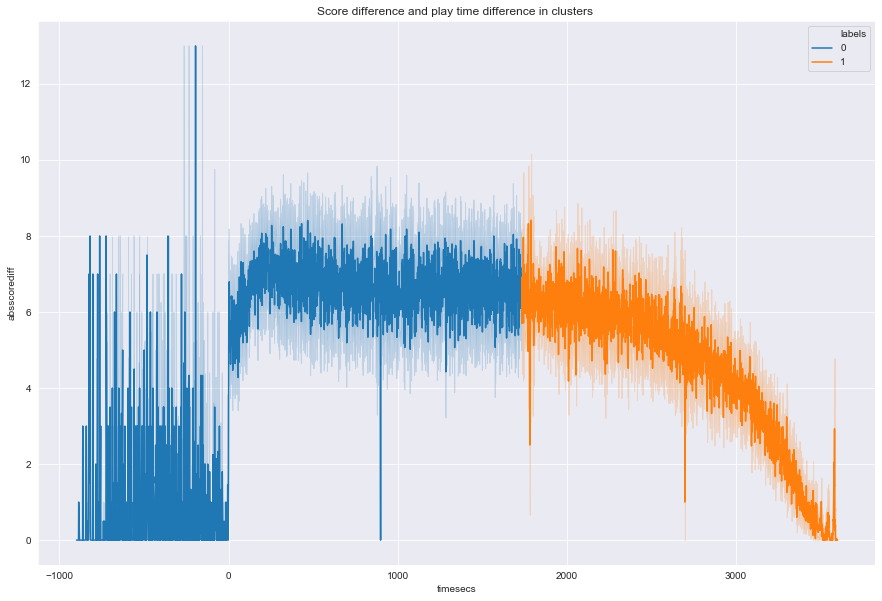

In [58]:
sns.lineplot(comp.timesecs,comp.absscorediff,hue= comp.labels )
plt.title('Score difference and play time difference in clusters ')
plt.show()

#### Time seems to be easily distinguishable between the labels. The plot shows the relationship with time throughout a game vs score difference in cluster 0 and 1. 

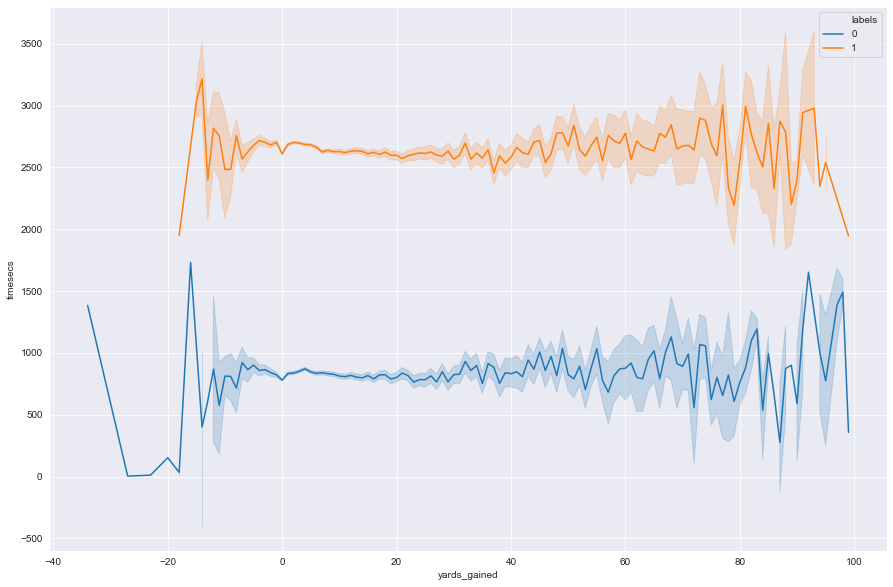

In [59]:
sns.lineplot(x="yards_gained", y="timesecs",
             hue="labels",
             data=comp)

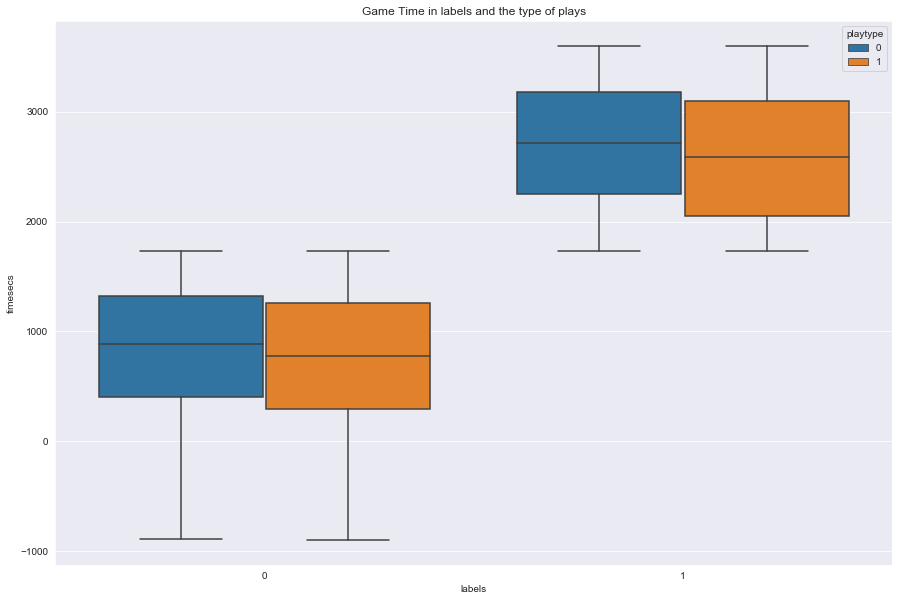

In [60]:
sns.boxplot(x = comp.labels,y = comp.timesecs,hue = comp.playtype)
plt.title('Game Time in labels and the type of plays')
plt.show()

#### The plot above shows the run vs pass lays called during the game. It doesn't show that teams were trying to establish the Run before passing the ball due to the balnced boxplots of 0 and 1's. There are more pass plays in the second half of games. 

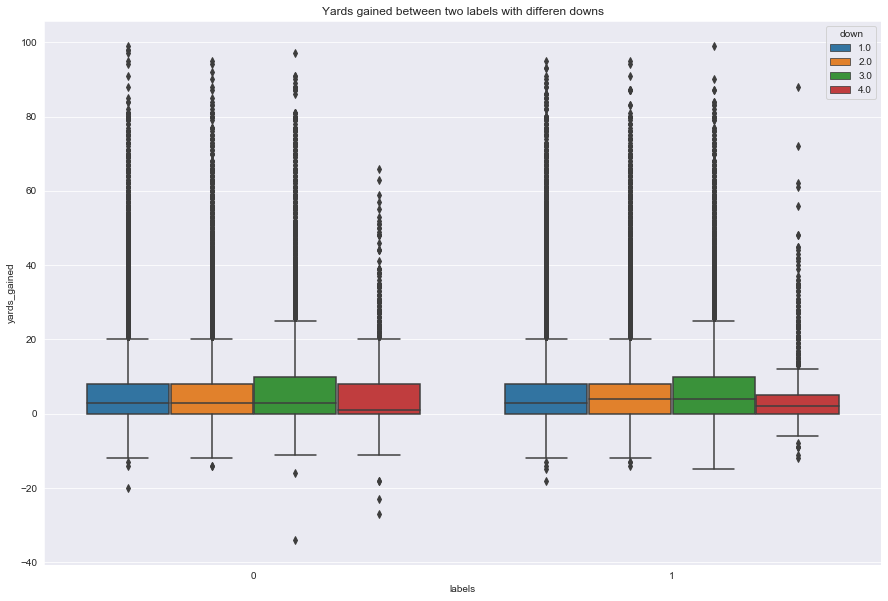

In [61]:
sns.boxplot(comp.labels,comp.yards_gained,hue= comp.down)
plt.title('Yards gained between two labels with differen downs')
plt.show()

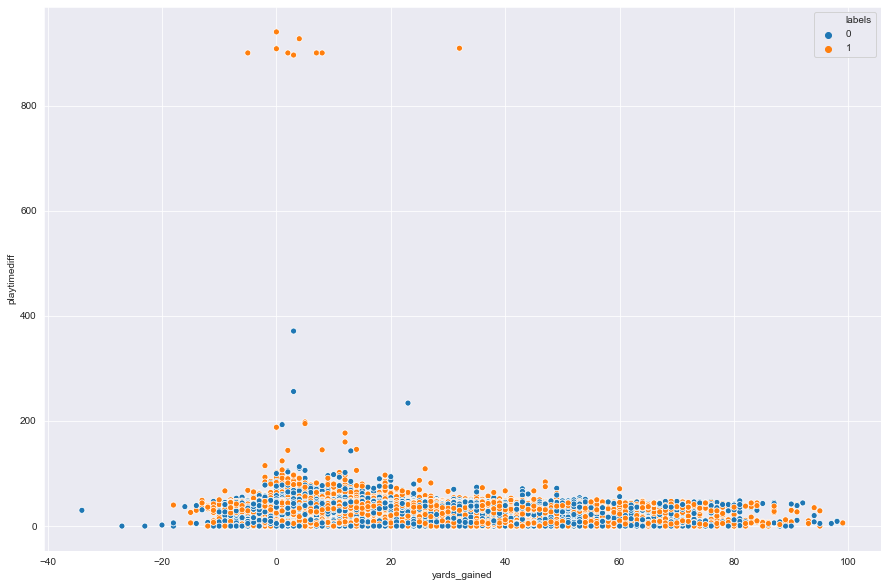

In [62]:
sns.scatterplot(x="yards_gained", y="playtimediff",
             hue="labels",
             data=comp)

#### PLaytime difference and the yards gained arn't that similar as shown due to lack of labels being separated. The plot is interesting because the plays that gained the most yards caught the defense offguard with little to no difference in time to call plays. 

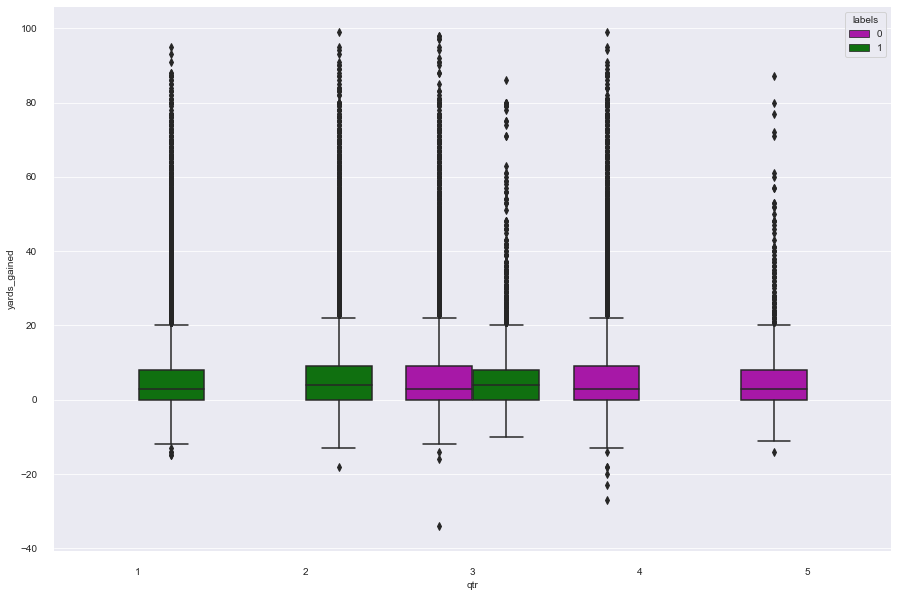

In [63]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="qtr", y="yards_gained",
            hue="labels", palette=["m", "g"],
            data=comp)
sns.despine(offset=10, trim=True)

In [73]:
ttest_ind_from_stats(mean1=6.008949, std1=8.922250, nobs1=102802,
                     mean2=5.972191, std2=8.634411, nobs2=136648)

Ttest_indResult(statistic=1.0164478363322866, pvalue=0.309417202848436)

A p-value of greater than 0.05 from our t-test of yards gained per play, we accept our null hypothesis that the teams are less or neutral in their aggreassive playcalling in both halves. 

#### The above plot shows the clusters have been divided mostly based on quarters than anything else. All quarters are evenly distributed based on yards gained and plays 

### Question 1. does the play time difference help teams call a better play?

Based on the just the plots the  longer play time difference doesn't seems to help teams call better plays. Although it wasn't seen in the clusters, the scatter plot was able to show that the most yards were gained due to hurry up offenses that caught the defenses off guard and not by methodic planning by the offenses.The play calling was different before and after halftime as shown by the p-value of less than .05. 

### Question 2. Are there differences in playcalling in different quarters of competitive games?

The strategy does seem to change if one is just eyeballing it on the plot.So, after conducting a t-test we find that there is a significant difference in playcalling in both halves.  


### Shortcomings and Improvements 

I think I would have been better off if I tried isolating a specific Team and check for what variables that team relies on to call a certain play. The clusters did give some info but it wasn'enough to provide valuable insights to my goal for this project. I did learn that I should maybe focus a little more time on the data cleaning and understanding the relationships of different features. One of the features that could have improved my project requiled NLP. I could use that feature to look what insight that could provide. 